## Import all libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Load all the csv files in the dataframes

In [66]:
path = "F:/NeU 2nd Sem/ADM/Assignment 2"
csv_pattern = os.path.join(path, "*.csv")
file_list = glob.glob(csv_pattern)

print("Created dataframe names: \n")
for file in file_list:
    
    vars()[os.path.basename(file)[:-4]] = pd.read_csv(file)
    print(os.path.basename(file)[:-4])
  

Created dataframe names: 

campaign_data
coupon_item_mapping
customer_demographics
customer_demographics_new
customer_transaction_data
customer_transaction_data_new
final_train
item_data
smote
test
train


In [67]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [68]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


## Checking and imputing null values in Number of children column

In [69]:
print(customer_demographics["no_of_children"].value_counts())

1     107
3+     60
2      55
Name: no_of_children, dtype: int64


In [70]:
customer_demographics[customer_demographics.no_of_children.isnull()].family_size.unique()

array(['2', '1'], dtype=object)

In [71]:
## fill number of children as 1 if family_size ==2 and marital_Status=Single

customer_demographics[(customer_demographics.no_of_children.isnull()) & (customer_demographics.family_size=="2") & (customer_demographics.marital_status == "Single")] = customer_demographics[(customer_demographics.no_of_children.isnull()) & (customer_demographics.family_size=="2") & (customer_demographics.marital_status == "Single")].fillna("1")

In [72]:
## fill number of children as 0 for all the remaining null values

customer_demographics["no_of_children"].fillna(0, inplace=True)

In [73]:
print(customer_demographics["no_of_children"].value_counts())

0     512
1     133
3+     60
2      55
Name: no_of_children, dtype: int64


### Encoding 3+ number of children to group 3 and changing the datatype of the column Number of Children to int

In [74]:
customer_demographics.replace(to_replace={"no_of_children":"3+"}, value=3, inplace=True)

In [75]:
print(customer_demographics["no_of_children"].value_counts())
customer_demographics = customer_demographics.astype({"no_of_children":"int16"})
customer_demographics.info()

0    512
1    133
3     60
2     55
Name: no_of_children, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    760 non-null int16
income_bracket    760 non-null int64
dtypes: int16(1), int64(3), object(3)
memory usage: 37.2+ KB


## Checking and imputing null values in Marital Status column

In [76]:
customer_demographics.marital_status.unique()

array(['Married', nan, 'Single'], dtype=object)

In [77]:
print(customer_demographics.marital_status.isnull().sum())

customer_demographics.marital_status.value_counts()

329


Married    317
Single     114
Name: marital_status, dtype: int64

In [78]:
print(customer_demographics[customer_demographics.marital_status=="Married"].no_of_children.value_counts())
x1 = customer_demographics[customer_demographics.marital_status=="Married"].no_of_children.value_counts().index
y1 = customer_demographics[customer_demographics.marital_status=="Married"].no_of_children.value_counts().values

0    175
1     63
3     48
2     31
Name: no_of_children, dtype: int64


### Encoding 5+ family size to group 5 and changing the datatype to int

In [79]:
customer_demographics.replace(to_replace={"family_size":"5+"}, value=5, inplace=True)
customer_demographics = customer_demographics.astype({"family_size":"int16"})
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null int16
no_of_children    760 non-null int16
income_bracket    760 non-null int64
dtypes: int16(2), int64(3), object(2)
memory usage: 32.7+ KB


In [80]:
print(customer_demographics[customer_demographics.marital_status=="Married"].family_size.value_counts())
x2 = customer_demographics[customer_demographics.marital_status=="Married"].family_size.value_counts().index
y2 = customer_demographics[customer_demographics.marital_status=="Married"].family_size.value_counts().values

2    175
3     63
5     48
4     31
Name: family_size, dtype: int64


([], <a list of 0 Text xticklabel objects>)

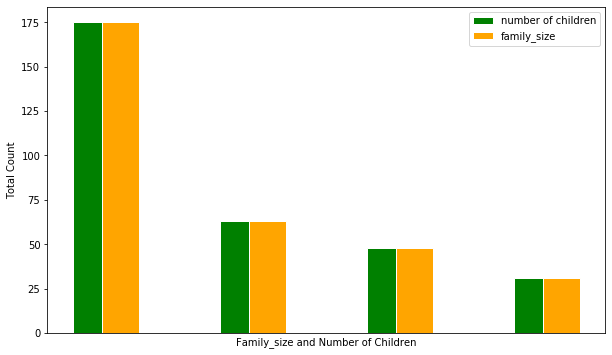

In [111]:
plt.figure(figsize=(10,6))
plt.bar([x-0.1 for x in range(1,5)], y1, color="green", width=0.25, edgecolor='white', label='number of children')
plt.bar([x+0.1 for x in range(1,5)], y2, color="orange", width=0.25, edgecolor='white', label='family_size')
plt.legend()
plt.xlabel("Family_size and Number of Children")
plt.ylabel("Total Count")
plt.xticks([])

In [82]:
## replace null marital status to Married if number of children is greater than 0

customer_demographics[(customer_demographics["no_of_children"]!=0) & 
                      customer_demographics.marital_status.isnull()] = customer_demographics[(customer_demographics["no_of_children"]!=0) & 
                                                                                             customer_demographics.marital_status.isnull()].fillna("Married")

In [83]:
## replace null marital status to Married if number of children is 0 and family size is 2

customer_demographics[(customer_demographics["no_of_children"]==0) & 
                      (customer_demographics.marital_status.isnull()) & 
                      (customer_demographics["family_size"] == 2)] = customer_demographics[(customer_demographics["no_of_children"]==0) & 
                                                                                             (customer_demographics.marital_status.isnull()) & 
                                                                                             (customer_demographics["family_size"] == 2)].fillna("Married")

In [84]:
## replace null marital status to Single if number of children is 0 and family size is 1

customer_demographics[(customer_demographics["no_of_children"]==0) & 
                      (customer_demographics.marital_status.isnull()) & 
                      (customer_demographics["family_size"] == 1)] = customer_demographics[(customer_demographics["no_of_children"]==0) & 
                                                                                             (customer_demographics.marital_status.isnull()) & 
                                                                                             (customer_demographics["family_size"] == 1)].fillna("Single")

In [85]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null int64
family_size       760 non-null int16
no_of_children    760 non-null int16
income_bracket    760 non-null int64
dtypes: int16(2), int64(3), object(2)
memory usage: 32.7+ KB


## Checking and removing duplicates

In [86]:
print("Inital number of records: ",customer_transaction_data.shape)
print("Number of duplicate records: ", customer_transaction_data.duplicated().sum())

Inital number of records:  (1324566, 7)
Number of duplicate records:  2916


In [87]:
customer_transaction_data.drop_duplicates(inplace=True)
print("Final number of records: ", customer_transaction_data.shape)

Final number of records:  (1321650, 7)


In [ ]:
customer_transaction_data.to_csv("F:/NeU 2nd Sem/ADM/Assignment 2/customer_transaction_data_new.csv")

## Exploratory Data Analysis

In [88]:
print(train.shape)
train.head()

(78369, 5)


,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [89]:
t = train.redemption_status.value_counts()
t = t.reset_index()
t.columns = ["Redemption Status", "Count"]
t["Percentage"] = t.Count / t.Count.sum() * 100
t

,Redemption Status,Count,Percentage
0,0,77640,99.069785
1,1,729,0.930215


In [90]:
## Campaign analysis

t = train["id"].groupby([train["campaign_id"], train["redemption_status"]]).count()
t

campaign_id  redemption_status
1            0                      142
             1                        1
2            0                      763
             1                        5
3            0                      406
             1                        2
4            0                      965
             1                        7
5            0                     1820
             1                        7
6            0                       64
             1                        1
7            0                     1580
             1                        4
8            0                    22356
             1                      199
9            0                     3145
             1                       23
10           0                     1716
             1                        7
11           0                     2776
             1                        6
12           0                     2538
             1                       12
13       

## Merge train and Campaign_data tables

In [94]:
train_Campaign = train.merge(campaign_data, on = "campaign_id")
print(train_Campaign.shape)
train_Campaign.head()

(78369, 8)


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,7,13,644,1050,0,X,19/05/13,05/07/13
3,21,13,1028,89,0,X,19/05/13,05/07/13
4,23,13,517,1067,0,X,19/05/13,05/07/13


In [117]:
train_Campaign["start_date"] = pd.to_datetime(train_Campaign.start_date, format="%d/%m/%y")
train_Campaign["end_date"] = pd.to_datetime(train_Campaign.end_date, format="%d/%m/%y")

train_Campaign.info()
train_Campaign.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 8 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 5.4+ MB


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,2013-05-19,2013-07-05
1,2,13,116,48,0,X,2013-05-19,2013-07-05
2,7,13,644,1050,0,X,2013-05-19,2013-07-05
3,21,13,1028,89,0,X,2013-05-19,2013-07-05
4,23,13,517,1067,0,X,2013-05-19,2013-07-05


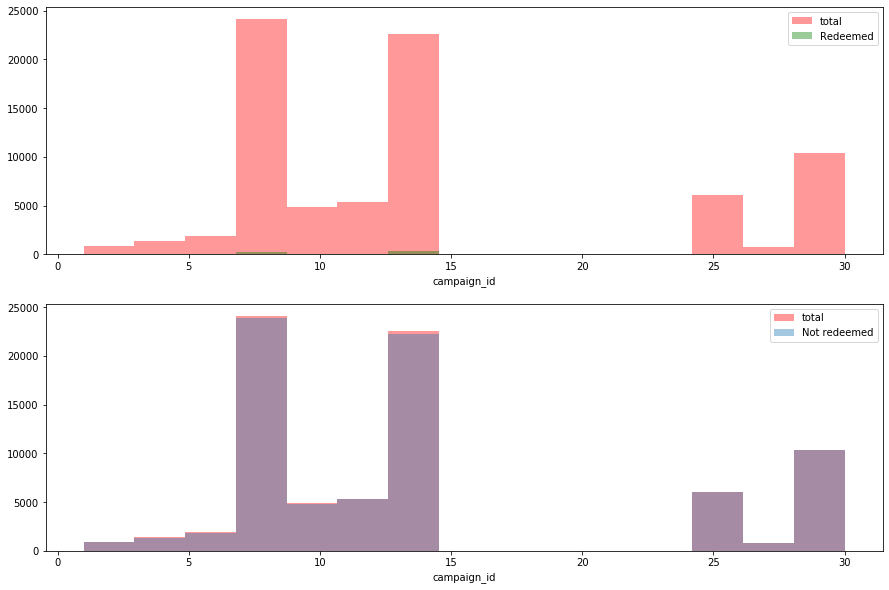

In [97]:
## Visualization of campaigns and the coupon redemption status


fig, axes = plt.subplots(2, 1, figsize=(15,10))
ax = sns.distplot(train_Campaign.campaign_id, bins=15, ax = axes[0],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 1].campaign_id, bins=15, ax = axes[0],  label="Redeemed", kde=False,color = "green")
ax.legend()

ax = sns.distplot(train_Campaign.campaign_id, bins=15, ax = axes[1],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 0].campaign_id, bins=15, ax = axes[1],  label="Not redeemed", kde=False)
ax.legend()

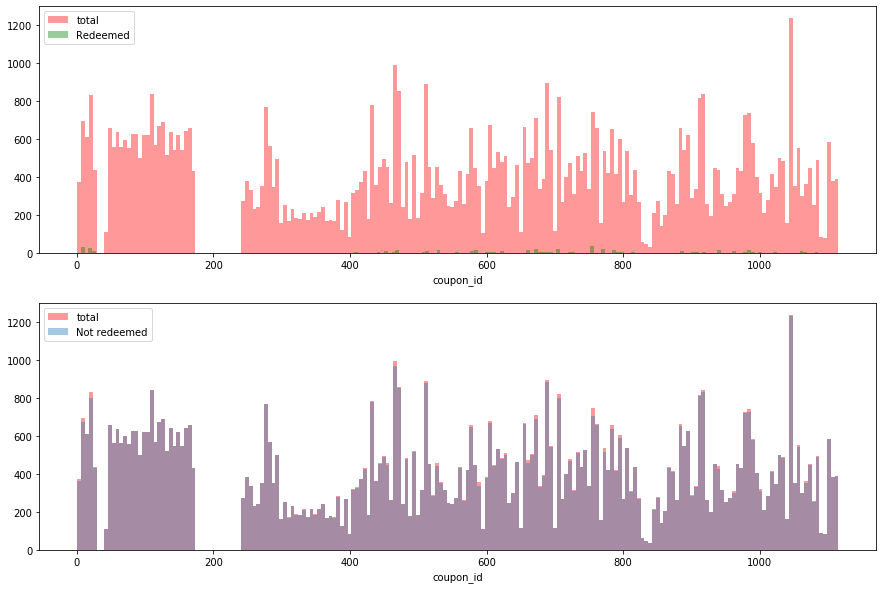

In [98]:
## Visualization for coupons and their redemption status

fig, axes = plt.subplots(2, 1, figsize=(15,10))
ax = sns.distplot(train_Campaign.coupon_id, bins=200, ax = axes[0],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 1].coupon_id, bins=200, ax = axes[0],  label="Redeemed", kde=False,color = "green")
ax.legend()

ax = sns.distplot(train_Campaign.coupon_id, bins=200, ax = axes[1],  label="total", kde=False,color = "red")
ax = sns.distplot(train_Campaign[train_Campaign.redemption_status == 0].coupon_id, bins=200, ax = axes[1],  label="Not redeemed", kde=False)
ax.legend()

## Merging coupon_item_mapping and item_data table

In [122]:
coupon_item_mapping.coupon_id.nunique(), coupon_item_mapping.item_id.nunique(),

(1116, 36289)

In [124]:
item_data.head()
item_data.item_id.nunique()

74066

In [128]:
coupon_item_data_mapping = coupon_item_mapping.merge(item_data, on="item_id", how="left")
print(coupon_item_data_mapping.shape)
coupon_item_data_mapping.head()

(92663, 5)


,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [106]:
train_Campaign_coup_itemDtl = train_Campaign_coup_item.merge(item_data, on = "item_id")
print(train_Campaign_coup_itemDtl.shape)
train_Campaign_coup_itemDtl.head()

(6420694, 12)


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,item_id,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,24775,1636,Established,Grocery
1,117,13,22,741,0,X,19/05/13,05/07/13,24775,1636,Established,Grocery
2,370,13,27,1168,0,X,19/05/13,05/07/13,24775,1636,Established,Grocery
3,525,13,22,413,0,X,19/05/13,05/07/13,24775,1636,Established,Grocery
4,554,13,27,1061,0,X,19/05/13,05/07/13,24775,1636,Established,Grocery


## Customer_transaction_data and item_data tables

In [129]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [134]:
customer_transaction_data_dtl = customer_transaction_data.merge(item_data, on="item_id")
print(customer_transaction_data_dtl.shape)
customer_transaction_data_dtl.head()

(1321650, 10)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,56,Local,Natural Products
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,56,Local,Natural Products


In [139]:
customer_transaction_data_dtl[customer_transaction_data_dtl.coupon_discount != 0].head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
378,2012-07-13,3,31962,2,146.04,-63.40,-39.18,524,Established,Grocery
379,2012-07-16,879,31962,2,162.07,-63.40,-19.59,524,Established,Grocery
394,2012-08-20,879,31962,2,162.07,-63.40,-19.59,524,Established,Grocery
436,2012-11-16,3,31962,1,108.28,0.00,-19.59,524,Established,Grocery
538,2013-05-03,1115,31962,1,89.05,-35.26,-35.62,524,Established,Grocery


In [144]:
customer_transaction_data_dtl.brand.nunique(), customer_transaction_data_dtl.brand_type.nunique(), customer_transaction_data_dtl.category.nunique()

(5528, 2, 19)

In [151]:
customer_transaction_data_dtl.date = pd.to_datetime(customer_transaction_data_dtl.date, format="%Y-%m-%d")
customer_transaction_data_dtl.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,135,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
2,2012-01-02,464,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
3,2012-01-12,1185,26830,1,45.95,0.00,0.0,56,Local,Natural Products
4,2012-01-13,1140,26830,1,45.95,0.00,0.0,56,Local,Natural Products


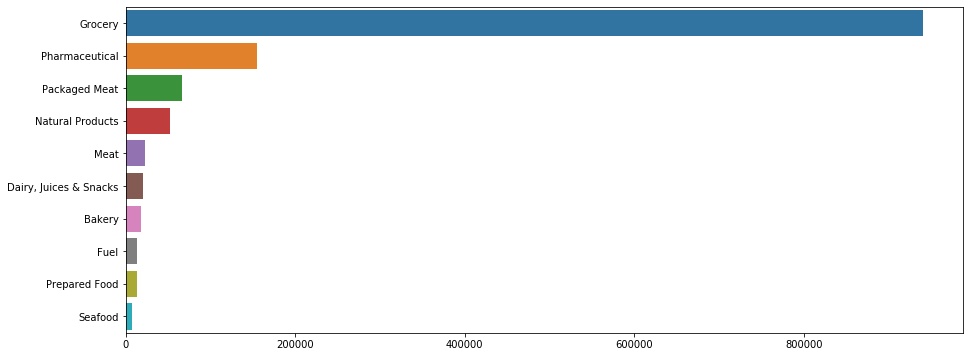

In [158]:
## item categories barplot

plt.figure(figsize=(15,6))
sns.barplot(x=customer_transaction_data_dtl.category.value_counts().values[:10], y=customer_transaction_data_dtl.category.value_counts().index[:10])

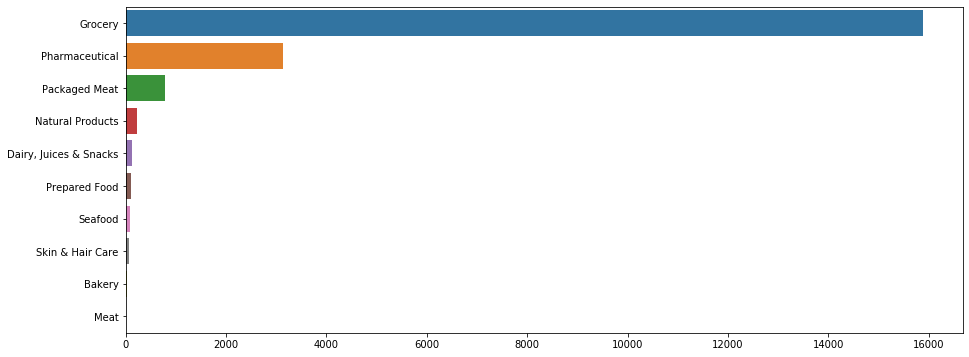

In [162]:
df = customer_transaction_data_dtl[customer_transaction_data_dtl.coupon_discount!=0]
plt.figure(figsize=(15,6))
sns.barplot(x=df.category.value_counts().values[:10], y=df.category.value_counts().index[:10])
#

## Word cloud to check frequency of different item categories

(-0.5, 399.5, 199.5, -0.5)

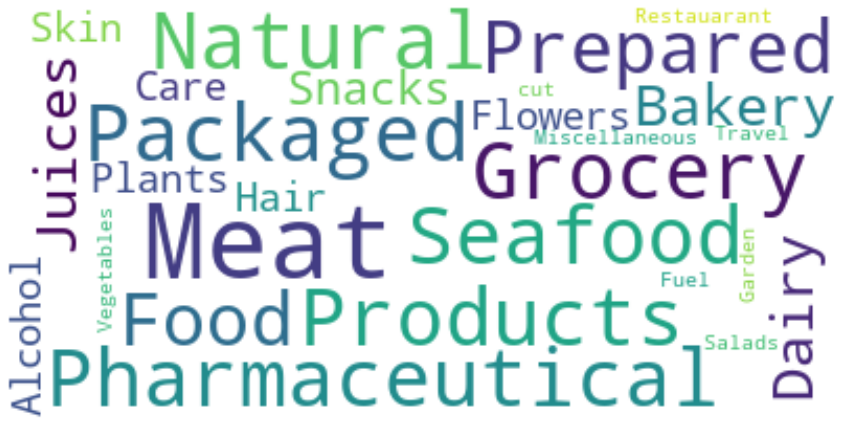

In [138]:
wordcloud = WordCloud(background_color="white", max_font_size=50).generate(' '.join(customer_transaction_data_dtl.category.unique()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## Alternating Least Square(ALS) model for recommendation

In [163]:

import sys
import pandas as pd
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import random

from sklearn.preprocessing import MinMaxScaler

import implicit

# Load the data in similar fashion and keep the required columns, like user_id, item_id and quantity

raw_data = customer_transaction_data[["customer_id", "item_id", "quantity"]] 
#raw_data = raw_data.drop(raw_data.columns[1], axis=1)
raw_data.columns = ['user', 'mcat', 'purchase_cnt']

# Drop missing values from the data
data = raw_data.dropna()
data = data.copy()

# Create a categorical user_id and mcat_id column
data['user'] = data['user'].astype("category")
data['mcat'] = data['mcat'].astype("category")
data['user_id'] = data['user'].cat.codes
data['mcat_id'] = data['mcat'].cat.codes

# The implicit library expects data as a item-user matrix so we need to create two matricies, one for fitting the model (item-user) 
# and another for recommendations (user-item)
sparse_item_user = sparse.csr_matrix((data['purchase_cnt'].astype(float), (data['mcat_id'], data['user_id'])))
sparse_user_item = sparse.csr_matrix((data['purchase_cnt'].astype(float), (data['user_id'], data['mcat_id'])))

# Initializing the als algoritm and train the model using item-user matrix
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)

# Calculating the confidence by multiplying sparse matrix with the alpha value.
alpha_val = 15
data_conf = (sparse_item_user * alpha_val).astype('double')

#Fitting the model
model.fit(data_conf)

Ids = list(data.user_id.unique())
R1 = pd.DataFrame(columns=['mcat_id','score','user_id'])
R1


for i in range(len(Ids)):
    user_id = Ids[i]
    
    recommended = model.recommend(user_id, sparse_user_item)

    mcats = []
    scores = []
    users = []

# Get mcat names from mcat ids
    for item in recommended:
        idx, score = item
        mcats.append(data.mcat.loc[data.mcat_id == idx].iloc[0])
        #users.append(data.user.loc[data.user_id== idx].iloc[0])
        scores.append(score)

    # Create a dataframe of mcat names and scores
    recommendations = pd.DataFrame({'mcat_id': mcats, 'score': scores})
    recommendations['user_id'] = data.user.loc[data.user_id== Ids[i]].iloc[0]

#print(recommendations)
    
    R1 = R1.append(recommendations)
        
        
print(R1.shape)

#Saving the outputs in the required format
R2 = R1[['user_id','mcat_id', 'score']]
R2 = R2.sort_values(by='user_id')
#R2.to_csv('F:/NeU 2nd Sem/ADM/Assignment 2/user_to_mcat_recommen_ALS_grp_id13.csv',index=False)


(15820, 3)
